More wine!
We are working with two datasets of Portuguese red and white wine variants. The data is related to red and white variants of the Portuguese "Vinho Verde" wine.

* Paper: https://www.semanticscholar.org/paper/Modeling-wine-preferences-by-data-mining-from-Cortez-Cerdeira/bf15a0ccc14ac1deb5cea570c870389c16be019c


The columns in the datasets are as follows:

1. fixed acidity: most acids involved with wine or fixed or nonvolatile (do not evaporate readily)
2. volatile acidity: the amount of acetic acid in wine, which at too high of levels can lead to an unpleasant, vinegar taste
3. citric acid: found in small quantities, citric acid can add 'freshness' and flavor to wines
4. residual sugar: the amount of sugar remaining after fermentation stops, it's rare to find wines with less than 1 gram/liter and wines with greater than 45 grams/liter are considered sweet
5. chlorides: the amount of salt in the wine
6. free sulfur dioxide: the free form of SO2 exists in equilibrium between molecular SO2 (as a dissolved gas) and bisulfite ion; it prevents microbial growth and the oxidation of wine
7. total sulfur dioxide: amount of free and bound forms of S02; in low concentrations, SO2 is mostly undetectable in wine, but at free SO2 concentrations over 50 ppm, SO2 becomes evident in the nose and taste of wine
8. density: the density of wine is close to that of water depending on the percent alcohol and sugar content
9. pH: describes how acidic or basic a wine is on a scale from 0 (very acidic) to 14 (very basic); most wines are between 3-4 on the pH scale
10. sulphates: a wine additive which can contribute to sulfur dioxide gas (S02) levels, wich acts as an antimicrobial and antioxidant
11. alcohol: the percent alcohol content of the wine

There are two datasets, one for red wine and one for white wine.  Our goal is going to model the wine quality based on these datasets


## Lets first contatenate the two dataframes into a single dataframe called `wine` and analyze it

In [148]:
# Import necessary libraries

import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import RobustScaler

In [149]:
red_wine = pd.read_csv(r"C:\Users\user\Downloads\GIT HUB DOC\THISONE\winequalityred.csv")
red_wine['type'] = 'red'

white_wine = pd.read_csv(r"C:\Users\user\Downloads\GIT HUB DOC\THISONE\winequalitywhite.csv")
white_wine['type'] = 'white'

data = pd.concat([red_wine, white_wine], ignore_index=True)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## I just realized that the column `type`should not be a string, but a categorical column that is why I Changed the column `type` to a numerical column and display the first 5 rows to analyze futher my data

In [150]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
data['type_encoded'] = label_encoder.fit_transform(data['type'])

In [151]:
data['type'] = pd.Categorical(data['type'])
data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_encoded
3670,6.5,0.19,0.26,5.2,0.040,31.0,140.0,0.99500,3.26,0.68,9.5,6,white,1
4172,6.3,0.34,0.36,4.9,0.035,31.0,185.0,0.99460,3.15,0.49,9.7,5,white,1
3708,7.7,0.23,0.31,10.7,0.038,59.0,186.0,0.99690,3.12,0.55,9.5,6,white,1
5279,6.8,0.15,0.41,12.9,0.044,79.5,183.0,0.99742,3.24,0.78,10.2,6,white,1
4668,7.0,0.53,0.43,6.1,0.029,6.0,76.0,0.99118,3.08,0.50,12.5,8,white,1


In [152]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_encoded
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0


In [153]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   fixed acidity         6497 non-null   float64 
 1   volatile acidity      6497 non-null   float64 
 2   citric acid           6497 non-null   float64 
 3   residual sugar        6497 non-null   float64 
 4   chlorides             6497 non-null   float64 
 5   free sulfur dioxide   6497 non-null   float64 
 6   total sulfur dioxide  6497 non-null   float64 
 7   density               6497 non-null   float64 
 8   pH                    6497 non-null   float64 
 9   sulphates             6497 non-null   float64 
 10  alcohol               6497 non-null   float64 
 11  quality               6497 non-null   int64   
 12  type                  6497 non-null   category
 13  type_encoded          6497 non-null   int32   
dtypes: category(1), float64(11), int32(1), int64(1)
memory u

## Now , I will convert this problem into a classification problem, so i will need a categorical target and for that i will use the `quality` column, so lets  analyze the `quality` column and  convert it into a categorical target



In [154]:
data["quality"].nunique()

7

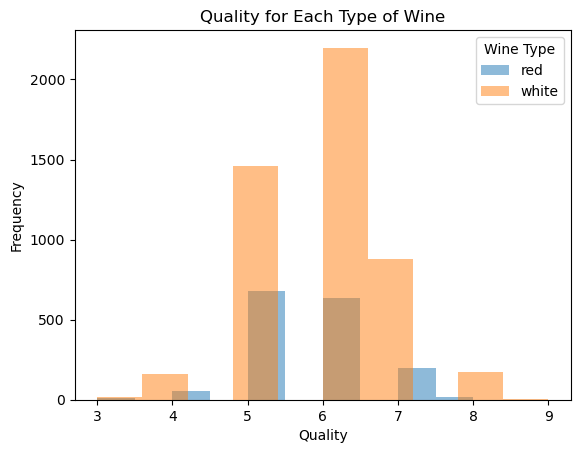

In [155]:
import matplotlib.pyplot as plt

types_of_wine = data['type'].unique()

for wine_type in types_of_wine:
    subset = data[data['type'] == wine_type]  
    subset['quality'].plot(kind='hist', alpha=0.5, label=str(wine_type))

plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality for Each Type of Wine')
plt.legend(title='Wine Type')
plt.show()


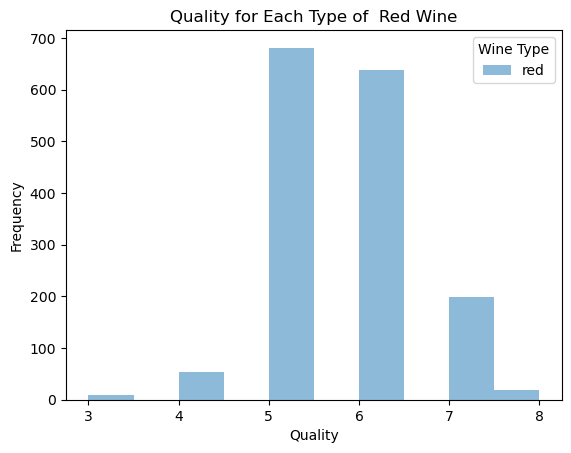

In [156]:
import matplotlib.pyplot as plt

types_of_wine = red_wine['type'].unique()

for wine_type in types_of_wine:
    subset = red_wine[red_wine['type'] == wine_type] 
    subset['quality'].plot(kind='hist', alpha=0.5, label=str(wine_type))

plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality for Each Type of  Red Wine')
plt.legend(title='Wine Type')
plt.show()


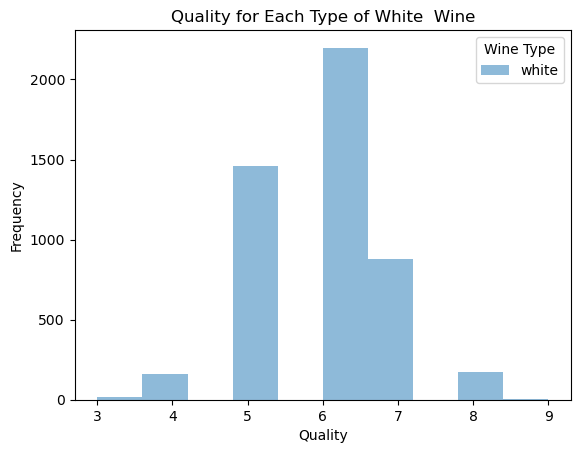

In [157]:
import matplotlib.pyplot as plt

types_of_wine = white_wine['type'].unique()

for wine_type in types_of_wine:
    subset = white_wine[white_wine['type'] == wine_type]  # Creates a subset of df where 'type' is the current wine_type
    subset['quality'].plot(kind='hist', alpha=0.5, label=str(wine_type))

plt.xlabel('Quality')
plt.ylabel('Frequency')
plt.title('Quality for Each Type of White  Wine')
plt.legend(title='Wine Type')
plt.show()


In [158]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
type_encoded            0
dtype: int64

In [159]:
data['target'] = (data['quality'] > 6).astype(int)

# I have picked number 6 as it is including a big majority of the types of wines that we can see from the histogram , as i did the chose in a fast and practical way

print(data[['quality', 'target']].head())

   quality  target
0        5       0
1        5       0
2        5       0
3        6       0
4        5       0


In [160]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_encoded,target
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0


## Now lets do some feature engineering , so let's create some new features

In [161]:
data['free_to_total_sulfur_ratio'] = data['free sulfur dioxide'] / data['total sulfur dioxide']

In [162]:
data['sugar_plus_chlorides'] = data['residual sugar'] + data['chlorides']

In [163]:
data['pH_times_alcohol'] = data['pH'] * data['alcohol']

In [164]:
data['alcohol_bin'] = pd.cut(data['alcohol'], bins=3, labels=['0', '1', '2'])

In [165]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type,type_encoded,target,free_to_total_sulfur_ratio,sugar_plus_chlorides,pH_times_alcohol,alcohol_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,0.323529,1.976,32.994,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red,0,0,0.373134,2.698,31.360,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red,0,0,0.277778,2.392,31.948,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red,0,0,0.283333,1.975,30.968,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red,0,0,0.323529,1.976,32.994,0


## Now that I have a target and some new features, I can create a classification model But first, I will remove the `quality` column and split the data into features and target.

In [166]:
data = data.drop(["quality"], axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type,type_encoded,target,free_to_total_sulfur_ratio,sugar_plus_chlorides,pH_times_alcohol,alcohol_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,0,0,0.323529,1.976,32.994,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red,0,0,0.373134,2.698,31.360,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red,0,0,0.277778,2.392,31.948,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red,0,0,0.283333,1.975,30.968,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red,0,0,0.323529,1.976,32.994,0


In [167]:
data = data.drop(["type"], axis=1)
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type_encoded,target,free_to_total_sulfur_ratio,sugar_plus_chlorides,pH_times_alcohol,alcohol_bin
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,0.323529,1.976,32.994,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,0,0.373134,2.698,31.360,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,0,0.277778,2.392,31.948,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,0,0.283333,1.975,30.968,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,0,0.323529,1.976,32.994,0


In [168]:
# Splitting the data
x = data.drop('target', axis=1)
y = data['target']
x_train, x_test, y_train, y_test = train_test_split( ##
    x, y,               # arrays or matrices I want to split
    test_size=0.3,      # the proportion to data for testing 
    random_state=123,   # can be any number. make the split reproducibile
    shuffle=True,       # if we want to shuffle data before splitting  For clasification problems when the data is not balanced)
)

# Display the sizes of the training and testing sets
print("Training X set size:", x_train.shape)
print("Testing X set size:", x_test.shape)
print("Training Y set size:", y_train.shape)
print("Testing Y set size:", y_test.shape)

Training X set size: (4547, 16)
Testing X set size: (1950, 16)
Training Y set size: (4547,)
Testing Y set size: (1950,)


## Now ,it is time for scaling the data.

In [169]:
#unbalanced data?  "targetvariable"
data['target'].value_counts()

target
0    5220
1    1277
Name: count, dtype: int64

In [170]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()

scaler.fit(x_train)
x_train_sc = scaler.transform(x_train)
x_test_sc = scaler.transform(x_test)

## Now , lest run a classification algorithm

In [171]:
model = LogisticRegression()

# Fitting the model 
model.fit(x_train_sc, y_train)

# Predicting on the test data
y_pred = model.predict(x_test_sc)

In [172]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='binary')
recall = recall_score(y_test, y_pred, average='binary')
f1_base = f1_score(y_test, y_pred, average='binary')
roc_auc = roc_auc_score(y_test, y_pred)

# Printing the metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1_Score_base:", f1)
print("ROC AUC Score:", roc_auc)

Accuracy: 0.8225641025641026
Precision: 0.6095890410958904
Recall: 0.23544973544973544
F1_Score_base: 0.3396946564885496
ROC AUC Score: 0.5995950967325012


In [173]:
print("F1_Score_base:", f1)

F1_Score_base: 0.3396946564885496


## I evaluated the performance of the machine learning model on the test set. 

This initial evaluation was conducted without any hyperparameter tuning to establish a baseline for the model's performance 

in order to ensure a balanced assessment across the precision and recall metrics, I chose the F1 score as the evaluation metric which is particularly useful in scenarios where uneven class distributions might exist.



In [174]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()

rf = RandomForestClassifier() #model

rf.fit(x_train_sc, y_train)

RandomForestClassifier()

In [175]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
Baseline_RF_y_pred = rf.predict(x_test_sc) #y_pred

# F1 Score
F1_score_rf = f1_score(y_test, Baseline_RF_y_pred, average='binary') # Use 'micro', 'macro', or 'weighted' for multi-class
print("F1_Score_rf:", f1)

F1_Score_rf: 0.3396946564885496


## Now, lets start Improving Model Performance with GridSearchCV 

In order to enhance our model, we'll use GridSearchCV to identify the best hyperparameters. Here’s how i’ll proceed:

i will Choose three hyperparameters and test at least three values for each, Use it with at least 3 folds to ensure our model is robust and generalizable.

This will not only help to find optimal settings but also assess the model's performance efficiently.

In [176]:
from sklearn.model_selection import GridSearchCV

grid_rf = {
    'n_estimators': [100, 200,300],
    'max_depth': [10, 50,70]
}

gs_rf = GridSearchCV(
    estimator=rf,
    param_grid=grid_rf,
    scoring='f1',
    cv=3,
    verbose=0
)

gs_rf.fit(x_train_sc, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 50, 70],
                         'n_estimators': [100, 200, 300]},
             scoring='f1')

In [177]:
best_params_rf = gs_rf.best_params_


## best score, just in case needed
best_params_rf

{'max_depth': 50, 'n_estimators': 200}

## Now ,as i determined the best hyperparameters using GridSearchCV, the next step is to train the model using these parameters. 

After training, evaluate the model's performance on the test set by calculating the F1 score. This score helps me to understand how well the model predicts compared to the baseline. 

In [178]:
best_rf = RandomForestClassifier(**best_params_rf)
best_rf.fit(x_train_sc, y_train)
best_pred_rf = best_rf.predict(x_test_sc)

In [179]:
best_f1_rf = f1_score(best_pred_rf, y_test)
print(best_f1_rf)

0.6528662420382165


In [180]:
improvement = (1 - (f1 / best_f1_rf)) * 100
print(f"Improvement: {improvement}%")

Improvement: 47.96872090858314%


## The 47.97% improvement indicates that the model, after hyperparameter optimization through GridSearchCV, performs significantly better compared to the baseline model. 

This improvement in the F1 score reflects a nearly half reduction in error or a nearly doubled accuracy in the model's predictions







## Now , lets get the predictions , In an excel to work with tem

In [181]:
pd.DataFrame(best_pred_rf).to_csv("best_pred_rf.csv")